In [1]:
import pandas as pd
import random 
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.feature_extraction.text import TfidfVectorizer


In [2]:
data_df = pd.read_csv('newsCorpora.csv', sep='\t', header=None)
data_df.drop(data_df.columns[0], axis=1, inplace=True)
rows = list(range(len(data_df.index)))
random.shuffle(rows)
data_df = data_df.iloc[rows]
data_df = data_df.reset_index(drop=True)
data_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'newsCorpora.csv'

In [ ]:
data_df.iloc[:, 3] = data_df.iloc[:, 3].astype('category')
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422419 entries, 0 to 422418
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   1       422419 non-null  object  
 1   2       422419 non-null  object  
 2   3       422417 non-null  object  
 3   4       422419 non-null  category
 4   5       422419 non-null  object  
 5   6       422419 non-null  object  
 6   7       422419 non-null  int64   
dtypes: category(1), int64(1), object(5)
memory usage: 19.7+ MB


Text(0.5, 1.0, 'Distribution of news categories')

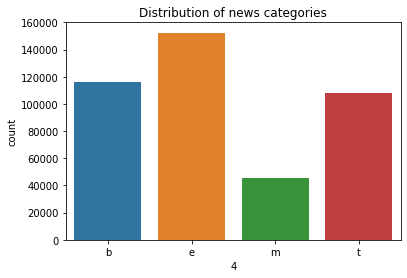

In [ ]:
sns.countplot(x=data_df.iloc[:, 3], data=data_df)
plt.title('Distribution of news categories')

In [ ]:
def data_processing(text):
    text = text.lower()
    text_tokens = word_tokenize(text)
    filtered_text = [word for word in text_tokens if word not in stop_words]
    stemmer = PorterStemmer()
    stemmed_text = [stemmer.stem(word) for word in filtered_text]
    lemmatizer = WordNetLemmatizer()
    lemmatized_text = [lemmatizer.lemmatize(word) for word in stemmed_text]
    return " ".join(lemmatized_text)


In [ ]:
X = data_df.iloc[:, 0].apply(data_processing)
Y = data_df.iloc[:, 3]

In [ ]:
data = pd.DataFrame()
data['title'] = X
data['category'] = Y
data.category.replace({'b': 0, 't': 1, 'e': 2, 'm': 3}, inplace=True)
data['word_count'] = data['title'].apply(lambda x: len(str(x).split(" ")))
data.head()

,title,category,word_count
0,wall st. open modestli lower set end may higher,0,9
1,nation brief : gm recal camaro,1,6
2,lindsay lohan - lindsay lohan : felt humili se...,2,10
3,"new michael jackson album , xscape , releas may",2,9
4,pump joy ! gasolin price drop 3 cent per gallon,1,10


In [ ]:
duplicate_count = data.duplicated().sum()
print("Number of duplicate rows: ", duplicate_count)

Number of duplicate rows:  21082


In [ ]:
data = data.drop_duplicates('title')
data.shape

(400350, 3)

In [ ]:
X = data['title']
Y = data['category']
vect = TfidfVectorizer()
X = vect.fit_transform(X)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)
# x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42)
print(x_train)

  (0, 20033)	0.4150212499988641
  (0, 34449)	0.3677078384506636
  (0, 34620)	0.44568849216428363
  (0, 30440)	0.33250986696345014
  (0, 6566)	0.35840199017304997
  (0, 8391)	0.413820530118962
  (0, 35178)	0.28921937384562496
  (1, 31974)	0.5547901705622353
  (1, 30495)	0.4927549345187046
  (1, 26344)	0.4510183443739448
  (1, 16890)	0.37106624988321074
  (1, 10595)	0.32907861126300736
  (2, 35369)	0.4231182691295576
  (2, 21476)	0.395899348003369
  (2, 18903)	0.3206700964088692
  (2, 33312)	0.2824170165179639
  (2, 25367)	0.37312682411560755
  (2, 24462)	0.3866284780440804
  (2, 19259)	0.4392502108368892
  (3, 15055)	0.4707913162008462
  (3, 39684)	0.3705278048145152
  (3, 15534)	0.426787355228129
  (3, 10258)	0.3548611777764011
  (3, 33729)	0.3481067745954976
  (3, 35106)	0.3263535588109774
  :	:
  (320277, 11989)	0.3525589388870293
  (320277, 26571)	0.31774936435390394
  (320277, 28223)	0.4185741966388827
  (320277, 15359)	0.33387227018528226
  (320277, 32307)	0.22231962487969376
  (3

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
logreg = LogisticRegression()
ovr = OneVsRestClassifier(logreg)
ovr.fit(x_train, y_train)
ovr_pred = ovr.predict(x_test)
ovr_acc = accuracy_score(y_test, ovr_pred)
print("test accuracy: {}".format(ovr_acc))

test accuracy: 0.9422505307855626


In [ ]:
print(classification_report(y_test, ovr_pred))
print("\n")
print(confusion_matrix(y_test, ovr_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92     22029
           1       0.93      0.92      0.93     20444
           2       0.97      0.98      0.97     28942
           3       0.95      0.91      0.93      8655

    accuracy                           0.94     80070
   macro avg       0.94      0.93      0.94     80070
weighted avg       0.94      0.94      0.94     80070



[[20385  1097   384   163]
 [ 1051 18905   391    97]
 [  331   230 28267   114]
 [  385   132   249  7889]]


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'estimator__C': [ 0.1, 1, 10, 100, 1000], 'estimator__penalty': ['l1', 'l2'], 'estimator__solver': ['liblinear', 'saga']} #, 'estimator__max_iter': [10000]}
grid = GridSearchCV(ovr, param_grid, refit=True, verbose=3)
# grid = GridSearchCV(ovr, param_grid, cv=5, scoring='accuracy')
grid.fit(x_train, y_train)

NameError: name 'ovr' is not defined

In [ ]:
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

NameError: name 'grid' is not defined

In [ ]:
logreg = LogisticRegression(C=1000, max_iter=10000, penalty='l2', solver='liblinear')
ovr = OneVsRestClassifier(logreg)
ovr.fit(x_train, y_train)
ovr_pred = ovr.predict(x_test)
ovr_acc = accuracy_score(y_test, ovr_pred)
print("test accuracy: {}".format(ovr_acc))

In [ ]:
print(classification_report(y_test, ovr_pred))
print("\n")
print(confusion_matrix(y_test, ovr_pred))

In [ ]:
# logreg = LogisticRegression(C=10, penalty='l2')
# logreg.fit(x_train, y_train)
# logreg_pred = logreg.predict(x_test)
# logreg_acc = accuracy_score(y_test, logreg_pred)
# print("test accuracy: {}".format(logreg_acc))


test accuracy: 0.9442737604595979


In [ ]:
# print(classification_report(y_test, logreg_pred))
# print('\n')
# print(confusion_matrix(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92     22172
           1       0.92      0.93      0.93     20433
           2       0.97      0.97      0.97     28761
           3       0.96      0.92      0.94      8704

    accuracy                           0.94     80070
   macro avg       0.94      0.94      0.94     80070
weighted avg       0.94      0.94      0.94     80070



[[20549  1146   298   179]
 [ 1052 18989   321    71]
 [  356   257 28038   110]
 [  336   158   178  8032]]
